<a href="https://colab.research.google.com/github/Ultan-Kearns/LYIT-Machine-Learning-Project/blob/main/FinalSubmissionNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading files and importing libraries

In [1947]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns # for the correlation matrix plot
import pydot
import pydotplus
import io
import cv2
from google.colab import files

uploaded = files.upload()
wdbcwh = pd.read_csv(io.BytesIO(uploaded['wdbcwh.csv']), header = 0)

Saving wdbcwh.csv to wdbcwh (22).csv


# Prepping and analyzing the data
In this section we prep and analyze the data we do this by dividing the data into two groups training and testing.  We will train the models with the training data so that we can predict the values within the testing dataset.  We randomize the data to produce a more accurate model and to show us the variation in performance of our models as the data is different everytime. We could also use a random seed to produce the same "random" set of rows everytime, although we wanted to avoid this to reduce our models bias towards the data when training and testing our models.

In [1948]:
# split data into training and test datasets

X = wdbcwh
y = wdbcwh['Diagnosis']
X_trainNB, X_testNB, y_trainNB, y_testNB = train_test_split(X, y, test_size=0.5)

features = list(wdbcwh.columns[2:32])
X = wdbcwh[features]
y = wdbcwh['Diagnosis']
from sklearn.model_selection import train_test_split
# could use random state 42 for same results every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


Here we are showing some of the values in our training sets and our test sets, by doing this we can see that we have a decent amount of randomness in our data

In [1949]:
print('X_train ',X_train)
print('y_train ',y_train)
print('X_test ',X_test)
print('y_test ',y_test)

X_train       Mean_Radius  Mean_Texture  ...  Worst_Symmetry  Worst_Fractal_Dimension
273        9.742         15.67  ...          0.2841                  0.08175
457       13.210         25.25  ...          0.2444                  0.06788
565       20.130         28.25  ...          0.2572                  0.06637
386       12.210         14.09  ...          0.2677                  0.08824
333       11.250         14.78  ...          0.2815                  0.07418
..           ...           ...  ...             ...                      ...
31        11.840         18.70  ...          0.4761                  0.14020
28        15.300         25.27  ...          0.4027                  0.09876
294       12.720         13.78  ...          0.2369                  0.06922
113       10.510         20.19  ...          0.2383                  0.09026
245       10.480         19.86  ...          0.2883                  0.07748

[284 rows x 30 columns]
y_train  273    B
457    B
565    M
386   

We show the shape of our test and training sets here, when using different split values we will get differing results.  It is important to know the shape of our sets as we can reshape them if needed to fit our models

In [1950]:
# print test sets shape will be same as training sets shape
print('X_test set shape: ',X_test.shape)
print('y_test set shape: ',y_test.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_test set shape:  (285, 30)
y_test set shape:  (285,)
X_train shape:  (284, 30)
y_train shape:  (284,)


Here we are replacing diagnosis values with a 1 for malignant and a 0 for benign, we do this because it makes it easier to perform numerical calculations on the sets. 

In [1951]:
# Disabled pandas warning due to false positive
pd.options.mode.chained_assignment = None  # default='warn'


# Replace malignant with 1 and benign with 0
y_train = y_train.replace({'M':1,'B':0})
y_test = y_test.replace({'M':1,'B':0})
y = y.replace({'M':1,'B':0})
# resetting pandas warning
pd.options.mode.chained_assignment = 'warn'  # default='warn'


In [1952]:
y_trainNB = y_trainNB.replace({'M':1,'B':0})
y_testNB = y_testNB.replace({'M':1,'B':0})
X_trainNB = X_trainNB.replace({'M':1,'B':0})
X_testNB = X_testNB.replace({'M':1,'B':0})

In [1953]:
y_train

273    0
457    0
565    1
386    0
333    0
      ..
31     1
28     1
294    0
113    0
245    0
Name: Diagnosis, Length: 284, dtype: int64

## Show standard deviation and variance between sets

Here we are showing both the standard deviation and variance of the sets, these are good methods for detecting outliers in our set, as we can see both sets have a somewhat high level of standard deviation.  We may try dropping columns from our dataframe to try and reduce this.  We can also see from these variables the amount of variation in certain features or throughout the overall dataset, these are useful metrics when training the models as we can ensure the models are trained with a large variety of different values.

Standard deviation is calculated by calculating the sum of each element in our data set then subtracting the population mean from the element and squaring we then divide by n and get the square root

Variance is calculated by essentially the same way but without getting the square root of our end result

In [1954]:
print('Standard deviation of values in x training set ',X_train.std())
print('Variance of diagnosis values in x training set: ', X_train.var())

Standard deviation of values in x training set  Mean_Radius                  3.413100
Mean_Texture                 4.170519
Mean_Perimeter              23.348442
Mean_Area                  326.778734
Mean_Smoothness              0.013593
Mean_Compactness             0.050519
Mean_Concavity               0.074920
Mean_Concave_Points          0.036495
Mean_Symmetry                0.026484
Mean_Fractal_Dimension       0.007506
Radius_SE                    0.249376
Texture_SE                   0.517065
Perimeter_SE                 1.797159
Area_SE                     36.502912
Smoothness_SE                0.002705
Compactness_SE               0.016202
Concavity_SE                 0.034181
Concave_Points_SE            0.006213
Symmetry_SE                  0.007943
Fractal_Dimension_SE         0.002609
Worst_Radius                 4.809257
Worst_Texture                6.039729
Worst_Perimeter             33.186424
Worst_Area                 558.236795
Worst_Smoothness             0.021996
Wo

In [1955]:

print('Standard deviation of values in y training set ',y_train.std())
print('Variance of values in y training set: ', y_train.var())

Standard deviation of values in y training set  0.48880107591234856
Variance of values in y training set:  0.23892649181306952


In [1956]:
print('Standard deviation of values in x testing set ',X_test.std())
print('Variance of values in x testing set: ', X_test.var())


Standard deviation of values in x testing set  Mean_Radius                  3.635579
Mean_Texture                 4.427500
Mean_Perimeter              25.235261
Mean_Area                  375.682594
Mean_Smoothness              0.014535
Mean_Compactness             0.054956
Mean_Concavity               0.084268
Mean_Concave_Points          0.041010
Mean_Symmetry                0.028349
Mean_Fractal_Dimension       0.006600
Radius_SE                    0.303040
Texture_SE                   0.584845
Perimeter_SE                 2.226479
Area_SE                     53.018005
Smoothness_SE                0.003275
Compactness_SE               0.019403
Concavity_SE                 0.025649
Concave_Points_SE            0.006138
Symmetry_SE                  0.008581
Fractal_Dimension_SE         0.002682
Worst_Radius                 4.865477
Worst_Texture                6.259760
Worst_Perimeter             34.069307
Worst_Area                 581.204431
Worst_Smoothness             0.023674
Wor

In [1957]:
print('Standard deviation of values in y testing set ',y_test.std())
print('Variance of values in y testing set: ', y_test.var())

Standard deviation of values in y testing set  0.47916821101802026
Variance of values in y testing set:  0.22960217445020997


## Show correlation
Here we are showing the correlation between each feature within the dataset.  Correlation is determined by analyzing the values of different features and comparing them with each other.  A 1 means that the values of the feature match exactly a value of -1 means that the values have very little in common.  It is important that we use a wide variety of features which have low correlation as it will yield more accurate results.  I have shown correlations of features for both the X and Y triaining and test sets.

### Training Set Correlation values

In [1958]:
# Show correlation of our training set
X_train.corr(method='pearson')

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Mean_Radius,1.000000,0.398881,0.997983,0.990942,0.075644,0.454776,0.596025,0.790693,0.092361,-0.369436,0.653314,-0.121057,0.645381,0.774261,-0.354787,0.197145,0.099043,0.359663,-0.171018,-0.072603,0.966496,0.361272,0.960139,0.931948,0.059370,0.421664,0.486175,0.734383,0.137847,-0.012485
Mean_Texture,0.398881,1.000000,0.405338,0.416096,-0.043993,0.245785,0.329498,0.337688,0.052933,-0.111804,0.376586,0.380828,0.383479,0.389293,-0.040271,0.224508,0.122528,0.149562,0.027728,0.040686,0.431789,0.908657,0.440823,0.433534,0.057628,0.316307,0.338928,0.323451,0.118843,0.120021
Mean_Perimeter,0.997983,0.405338,1.000000,0.989295,0.109446,0.506366,0.635851,0.820540,0.128743,-0.321546,0.667800,-0.111182,0.666589,0.782895,-0.340409,0.243328,0.129146,0.391393,-0.147444,-0.033129,0.967790,0.368046,0.966569,0.932299,0.087502,0.465227,0.523854,0.763168,0.165711,0.034381
Mean_Area,0.990942,0.416096,0.989295,1.000000,0.077094,0.450758,0.607201,0.794680,0.099244,-0.345521,0.689801,-0.091857,0.677770,0.813263,-0.301778,0.208866,0.117591,0.365944,-0.153438,-0.045707,0.969310,0.374949,0.962021,0.954249,0.071487,0.407925,0.483659,0.724246,0.125060,-0.005123
Mean_Smoothness,0.075644,-0.043993,0.109446,0.077094,1.000000,0.622945,0.466840,0.506334,0.560222,0.588016,0.296245,0.103503,0.271120,0.215505,0.361699,0.301777,0.199995,0.389367,0.189655,0.335560,0.135667,-0.002940,0.157087,0.124997,0.795512,0.427364,0.382238,0.452650,0.357983,0.525295
Mean_Compactness,0.454776,0.245785,0.506366,0.450758,0.622945,1.000000,0.858718,0.815145,0.628786,0.574307,0.522227,0.046015,0.575419,0.490871,0.085006,0.776813,0.499010,0.647438,0.256501,0.565310,0.498187,0.244702,0.553945,0.464385,0.541469,0.871287,0.791499,0.799463,0.534462,0.737894
Mean_Concavity,0.596025,0.329498,0.635851,0.607201,0.466840,0.858718,1.000000,0.897979,0.509519,0.364721,0.617924,0.089976,0.627584,0.610094,0.013423,0.731452,0.693442,0.725308,0.195232,0.557901,0.621188,0.319488,0.659418,0.600604,0.399885,0.750600,0.895431,0.842135,0.423448,0.562283
Mean_Concave_Points,0.790693,0.337688,0.820540,0.794680,0.506334,0.815145,0.897979,1.000000,0.456320,0.156931,0.725253,0.017385,0.729382,0.751781,-0.048561,0.525483,0.379718,0.641238,0.090378,0.305668,0.806235,0.324110,0.831723,0.776472,0.418897,0.686349,0.745743,0.914359,0.378805,0.406307
Mean_Symmetry,0.092361,0.052933,0.128743,0.099244,0.560222,0.628786,0.509519,0.456320,1.000000,0.544071,0.358325,0.120504,0.365738,0.257141,0.227901,0.500763,0.359889,0.440852,0.487996,0.455982,0.145311,0.051716,0.178624,0.131105,0.434970,0.491665,0.435919,0.423864,0.689380,0.521269
Mean_Fractal_Dimension,-0.369436,-0.111804,-0.321546,-0.345521,0.588016,0.574307,0.364721,0.156931,0.544071,1.000000,0.028433,0.190852,0.060487,-0.102546,0.462988,0.575911,0.460471,0.369940,0.382643,0.736574,-0.295076,-0.102559,-0.249175,-0.278053,0.503566,0.419567,0.336558,0.147628,0.357880,0.789714


### Test set correlation values

In [1959]:
X_test.corr(method='pearson')

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Mean_Radius,1.000000,0.256553,0.997810,0.985721,0.252824,0.549694,0.744016,0.849390,0.196999,-0.253580,0.701938,-0.078513,0.699347,0.725106,-0.122632,0.211729,0.318960,0.392352,-0.048136,-0.017419,0.973376,0.238603,0.970233,0.949969,0.171747,0.405725,0.562221,0.753521,0.190502,0.024538
Mean_Texture,0.256553,1.000000,0.262416,0.242842,-0.007194,0.225866,0.278175,0.255288,0.089126,-0.040121,0.199848,0.390727,0.206081,0.181132,0.040927,0.162928,0.173153,0.177631,-0.009636,0.063642,0.279754,0.915702,0.282563,0.263230,0.094411,0.242858,0.266378,0.269041,0.092539,0.117848
Mean_Perimeter,0.997810,0.262416,1.000000,0.985099,0.290709,0.599004,0.781766,0.876040,0.230849,-0.201927,0.712597,-0.067786,0.715872,0.733744,-0.099989,0.254938,0.357482,0.422883,-0.027278,0.016922,0.972614,0.244822,0.974801,0.950825,0.204309,0.446892,0.598038,0.779180,0.213034,0.065584
Mean_Area,0.985721,0.242842,0.985099,1.000000,0.257399,0.536114,0.746374,0.845217,0.194511,-0.227155,0.764040,-0.047446,0.761825,0.800544,-0.071584,0.213427,0.321353,0.379963,-0.009197,-0.000231,0.961210,0.214578,0.959755,0.966121,0.165308,0.375840,0.536328,0.722471,0.162044,0.010799
Mean_Smoothness,0.252824,-0.007194,0.290709,0.257399,1.000000,0.689868,0.567303,0.592749,0.556905,0.587165,0.306843,0.038861,0.316214,0.270864,0.310139,0.331783,0.316664,0.373110,0.209188,0.235265,0.284681,0.070480,0.313033,0.280141,0.813972,0.510108,0.480424,0.549210,0.431706,0.475683
Mean_Compactness,0.549694,0.225866,0.599004,0.536114,0.689868,1.000000,0.903038,0.844357,0.583731,0.563451,0.481630,0.044911,0.532159,0.441279,0.171520,0.709595,0.679822,0.640233,0.205040,0.453838,0.570859,0.250457,0.623971,0.551193,0.586793,0.860926,0.837823,0.831856,0.491321,0.643473
Mean_Concavity,0.744016,0.278175,0.781766,0.746374,0.567303,0.903038,1.000000,0.939757,0.495514,0.313712,0.643842,0.064478,0.685585,0.629829,0.159409,0.624894,0.719546,0.648871,0.162139,0.354928,0.749490,0.282967,0.791994,0.742045,0.489373,0.758026,0.875198,0.880276,0.400244,0.474896
Mean_Concave_Points,0.849390,0.255288,0.876040,0.845217,0.592749,0.844357,0.939757,1.000000,0.469248,0.179260,0.679749,0.023869,0.698921,0.661550,0.082174,0.463932,0.528541,0.595349,0.097902,0.214890,0.854110,0.265830,0.878784,0.839694,0.480815,0.651681,0.758137,0.908669,0.376080,0.336485
Mean_Symmetry,0.196999,0.089126,0.230849,0.194511,0.556905,0.583731,0.495514,0.469248,1.000000,0.417227,0.262326,0.134977,0.276616,0.207059,0.157824,0.365737,0.333938,0.349352,0.417417,0.221767,0.223160,0.126226,0.256307,0.218394,0.419893,0.459575,0.432992,0.437058,0.712308,0.363619
Mean_Fractal_Dimension,-0.253580,-0.040121,-0.201927,-0.227155,0.587165,0.563451,0.313712,0.179260,0.417227,1.000000,-0.026251,0.139871,0.021995,-0.085611,0.354767,0.559564,0.429001,0.309439,0.309216,0.640008,-0.208685,0.004206,-0.157953,-0.183266,0.511636,0.505176,0.359686,0.206988,0.306428,0.746846


## Heatmap of correlation in our dataset
As you can see from the legend the lighter the square the more highly correlated the feature data and the darker the square the less correlated.

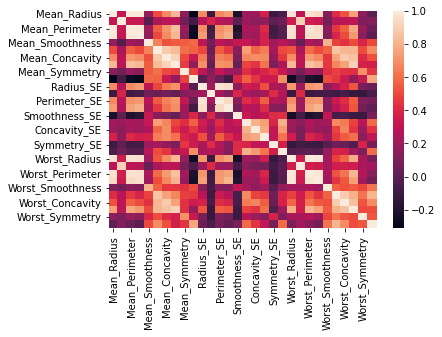

In [1960]:
# it computes the Pearson’s correlation coefficient.
corr_matrix = X.corr()
#The parameter ‘ annot=True ‘ displays the values of the correlation coefficient
#in each cell
sns.heatmap(corr_matrix, annot = False)
plt.show()


# Training the linear regression model

Here we are using linear regression to compare features in our model to see the correlation between them.  We are training this model to show us how dependent the variables are on one another.

# Creating linear regression model for Area Severity and Smoothness Severity
Here I have trained a model to show us the negative correlation between two features in our dataset, we can clearly see from this model that the Mean_Radius has a negative impact on the Mean_Fractal_Dimension.  When the smoothness severity value increases then on average the area severity value decreases and vice versa.

y test r^2 value:  1.0
mean_squared_error value:  0.0001703657991731741
Coefficient:  [[-0.00081242]]
Intercept:  [0.0741623]
predict  [[-0.05046269]]


(285,)

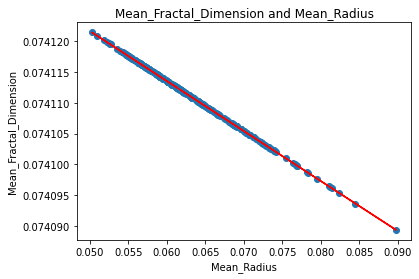

In [1961]:
# Here we train a model to perform linear regression data set to predict the diagnosis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from scipy import stats
# create the linear regression model by fitting training set to the test set
fractalDimensionArrayTest = np.array(X_test['Mean_Fractal_Dimension']).reshape(-1,1)
fractalDimensionArrayTrain = np.array(X_train['Mean_Fractal_Dimension']).reshape(-1,1)
X_trainArray = np.array(X_train['Mean_Radius']).reshape(-1,1)
X_testArray = np.array(X_test['Mean_Radius']).reshape(-1,1)
regression_model = LinearRegression().fit(X_trainArray, fractalDimensionArrayTrain)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(fractalDimensionArrayTest)
rSquared = regression_model.score(fractalDimensionArrayTest, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(fractalDimensionArrayTest, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)

plt.xlabel("Mean_Radius")
plt.ylabel("Mean_Fractal_Dimension")
plt.title('Mean_Fractal_Dimension and Mean_Radius')
plt.scatter(fractalDimensionArrayTest,y_pred)
plt.plot(fractalDimensionArrayTest,y_pred,c='r')
print('predict ',regression_model.predict([[153.4]]))
y_test.shape


I will demonstrate with some predictions below that the values are negatively skewed.  We will see that whenever we pass in a high fractal dimension the value will be lower and vice versa.  We can also see there is a low mean square error and a negative coefficient.  Since our coefficient is negative we will see that negative values will produce higher values for our dependent variable where as higher values will produce low values for our dependent variable

In [1962]:
# As we can see not too much of a difference between the values here
print('this value will be low: ', regression_model.predict([[0.5]]))
print('this value will be high: ', regression_model.predict([[0.1]]))

# just to make our example clearer let's use ridiculously inflated values  
print('let\'s make our model predict some grossly inflated / deflated values to show that these features do indeed have a negative impact on one another')
print('this value will be low: ', regression_model.predict([[100]]))
# I use a negative value here to demonstrate the radius the higher the mean fractal dimension
print('this value will be high: ', regression_model.predict([[-100]]))


this value will be low:  [[0.07375609]]
this value will be high:  [[0.07408106]]
let's make our model predict some grossly inflated / deflated values to show that these features do indeed have a negative impact on one another
this value will be low:  [[-0.00707955]]
this value will be high:  [[0.15540414]]


As we can see above that whenever I make the value of the mean fractal dimension higher then the value of our dependent variable will decrease, whenever I make it lower it will increase.  We can also see that the values don't have too much of an effect on each other this is because the negative correlation is around ~ -0.29

# Positive correlation
Here we compare the concave points severity with the concavity severity, we see that there is a positive linear correlation between the two variables, we also see that the R^2 value is one which indicates a possible overfitting of our model.  We can see clearly from this graph that the two variables have a high correlation and that if the value increases in one of the variables then we can predict that the other variable also increases

y test r^2 value:  1.0
mean_squared_error value:  3.544201992318646e-05
Coefficient:  [[0.13645545]]
Intercept:  [0.0074765]


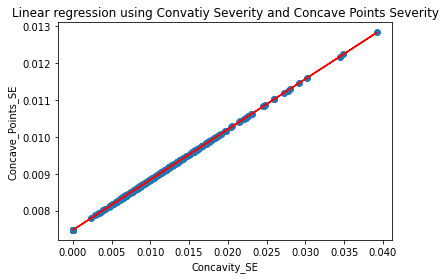

In [1963]:
# create the linear regression model by fitting training set to the test set
concavePointsSeverityArrayTest = np.array(X_test['Concave_Points_SE']).reshape(-1,1)
concavePointsSeverityArrayTrain = np.array(X_train['Concave_Points_SE']).reshape(-1,1)
X_trainArray = np.array(X_train['Concavity_SE']).reshape(-1,1)
X_testArray = np.array(X_test['Concavity_SE']).reshape(-1,1)
# here we need to reshape the data using numpy so that the training data matches the testdata
regression_model = LinearRegression().fit(X_trainArray, concavePointsSeverityArrayTrain)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(concavePointsSeverityArrayTest)
rSquared = regression_model.score(concavePointsSeverityArrayTest, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(concavePointsSeverityArrayTest, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)
plt.xlabel("Concavity_SE")
plt.ylabel("Concave_Points_SE")
plt.title('Linear regression using Convatiy Severity and Concave Points Severity')
plt.scatter(concavePointsSeverityArrayTest,y_pred)
plt.plot(concavePointsSeverityArrayTest,y_pred,c='r')

We can see here there is a positive coefficient which is the amount we expect the value to increase by when making a prediction, we can also see that there is a low mean squared error value this indicates the performance of the model and the distance away the points are from our line

Below we see the second models features have on one another, we can clearly see that the data has a positive correlation from our graph but let's show some concrete examples and perform some predictions using it.

In [1964]:
print('this value will be high: ', regression_model.predict([[0.5]]))
print('this value will be low: ', regression_model.predict([[0.1]]))

# just to show how high the impact will be with grossly inflated / deflated values values

print('let\'s make our model predict some grossly inflated / deflated values to show severity of impact')
print('this value will be high: ', regression_model.predict([[100]]))
print('this value will be low: ', regression_model.predict([[0.0000000001]]))


this value will be high:  [[0.07570423]]
this value will be low:  [[0.02112205]]
let's make our model predict some grossly inflated / deflated values to show severity of impact
this value will be high:  [[13.65302113]]
this value will be low:  [[0.0074765]]


Since the above values are highly correlated we see a greater rise and decrease in the predicted values when predicting than we did in the first linear regression model.  This is due to the fact that these two variables have a positive correlation of 0.776207, the features we used in our first model have a lower negative correlation which is why we don't see as much of an impact on them.  If they had a negative correlation of 0.776207 we would see the same rise and decrease in the first linear regression models predicted valules as well

# Examples of low and high correlation in our dataset

Additionally we can see here the Mean Perimeter has a positive correlation with our Mean Radius feature.  Below this image we can see an example of low negative correlation, these variables don't really impact each other much

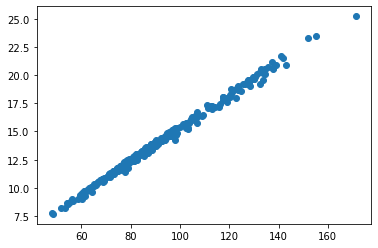

In [1965]:
# Example of positive Linear correlation between radius and perimeter
# since these correlate highly we can remove one of them from set

plt.scatter(X_train['Mean_Perimeter'],X_train['Mean_Radius'])


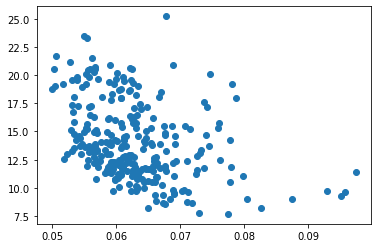

In [1966]:
# example of low negative correlation
plt.scatter(X_train['Mean_Fractal_Dimension'],X_train['Mean_Radius'])


In [1967]:
def predictValues(realValues,predictedValues):
  correct = 0;
  count = 0;
  actualValues = np.array(realValues).reshape(-1,1)
  for i in realValues:
    print('Actual: ', realValues[count], ' Predicted: ', predictedValues[count])
    if predictedValues[count] == realValues[count]:
      correct+=1
    count+=1
  print('Total values: ',count, ' correctly predicted values: ',correct)

In [1968]:
def predictKnnValues(realValues,predictedValues):
  correct = 0;
  count = 0;
  actualValues = np.array(realValues).reshape(-1,1)
  for i in realValues:
    print('Actual: ', realValues[count], ' Predicted: ', predictedValues[count])
    if predictedValues[count] == realValues[count]:
      correct+=1
    count+=1
  print('Total values: ',count, ' correctly predicted values: ',correct)

# KNN Predictions

Here we are using KNN to make predictions based on a number of features fed into the model.  As we can see it's score is 0.96 which isn't perfect but it's better to avoid overfitting the model so that it can adapt to new data

In [1969]:
# K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
y_trainArray = np.array(y_train).reshape(-1,1)
y_testArray = np.array(y_test).reshape(-1,1)

knn = KNeighborsClassifier(n_neighbors=55)
knn.fit(X_train,y_train)
print('Performance of model: ',knn.score(X,y))


Performance of model:  0.9138840070298769


In [1970]:
# Make prediction on testSet
predictValues(y,knn.predict(X))

Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  0
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  

# Naive Bayes prediction of diagnosis

Here we use naive bayes on both sets to perform  the diagnosis based on features from the dataset, I chose to input a large number of features into this model as generally this algorithm performs better when fitted with more features, in Naive Bayes the weights of the features have no bearing on the output.  The model below is underfitted it appears 

## References

Sklearn documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

You may also notice we are using a particular kind of Naive Bayes called Gaussian Naive Bayes for this model.  We chose to include this version of Naive Bayes due to it's ability to handle continuous data. The algorithm also has the advantage of speed and is frequently used in email spam classifiers.  The algorithm works by assuming that the continuous values across the features are normally distributed in a Gaussian fashion(think of a bell curve!)

In [2007]:

from sklearn.naive_bayes import GaussianNB
yTestArray = np.array(y_test).reshape(-1,1)
y_trainArray = np.array(y_train).reshape(-1,1)
naive_bayes = GaussianNB()
y_train_pred = naive_bayes.fit(X_train,y_train).predict(y_trainArray)
y_pred = naive_bayes.fit(X_train,y_train).predict(yTestArray)


In [2008]:
predictValues(yTestArray,y_pred)
predictValues(y_trainArray,y_train_pred)


Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predic

In [2003]:
y_train

273    0
457    0
565    1
386    0
333    0
      ..
31     1
28     1
294    0
113    0
245    0
Name: Diagnosis, Length: 284, dtype: int64

## Second Naive Bayes Model

Demonstrating the zeroing out phenomenon

In [2010]:
yTestArray = np.array(y_testNB).reshape(-1,1)
y_trainArray = np.array(y_trainNB).reshape(-1,1)
naive_bayes = GaussianNB()
y_train_pred = naive_bayes.fit(X_trainNB,y_trainNB).predict(y_trainArray)
y_pred = naive_bayes.fit(X_trainNB,y_trainNB).predict(yTestArray)


In [2012]:
predictValues(y_trainArray,y_train_pred)
predictValues(yTestArray,y_pred) 
 


Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predic

# Decision Trees

In [1975]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


Training the first default tree model

In [1976]:
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#clf = clf.fit (X,y)


In [1977]:
print(y_test.shape,y_train.shape,X_train.shape,X_test.shape)

(285,) (284,) (284, 30) (285, 30)


Here we display the tree

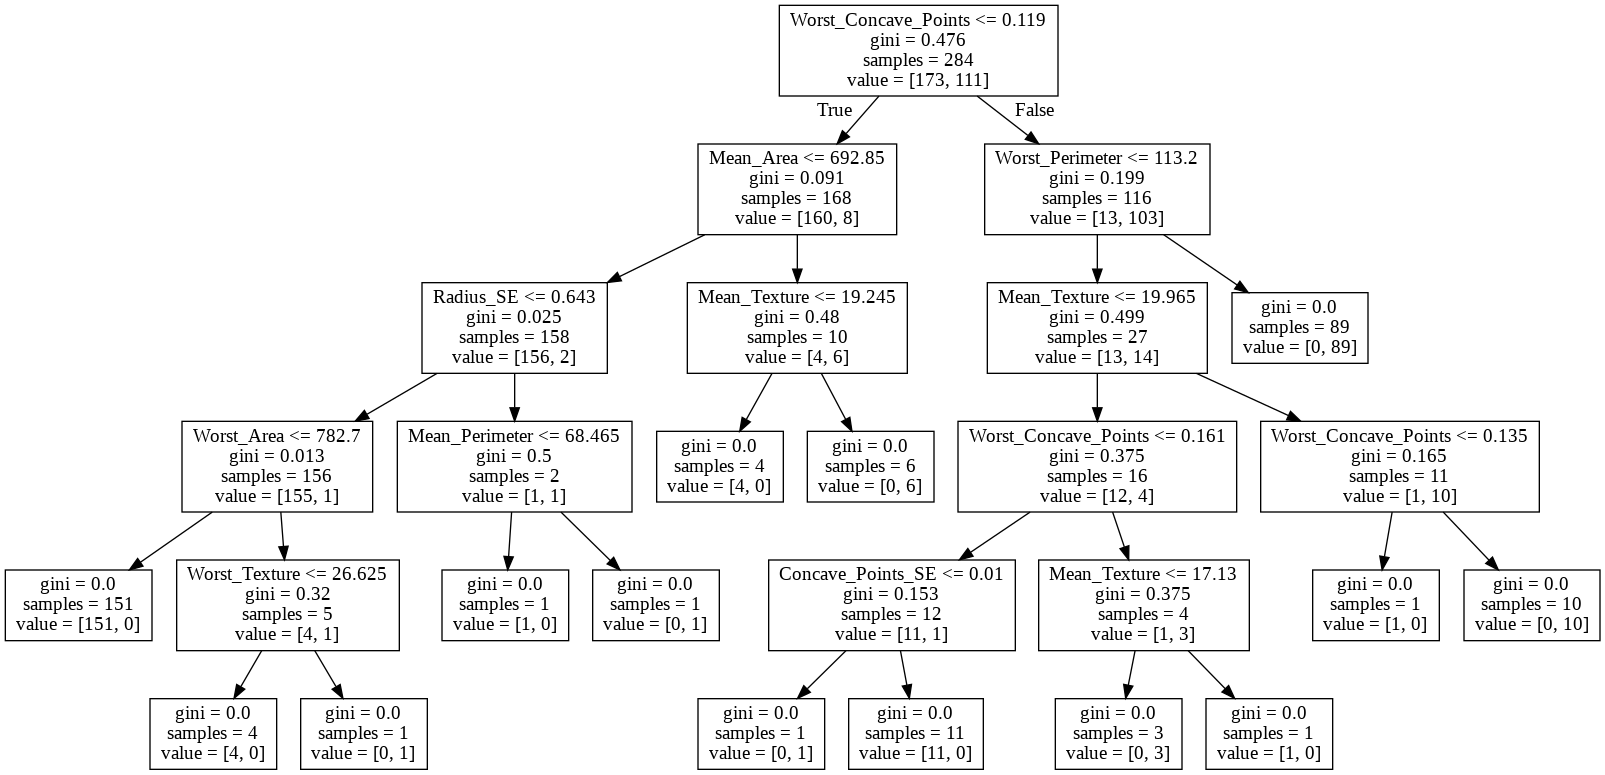

In [1978]:
from IPython.display import Image
from six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

The predicticton result for head data, this should really be fresh data not reusing training data



In [1979]:
#When we use our training data above we should use our validation data here to test the predictions
print("Making predictions for the following 5 patients:")
print(X_test)
print("The predictions are")
print(clf.predict(X_test))

Making predictions for the following 5 patients:
     Mean_Radius  Mean_Texture  ...  Worst_Symmetry  Worst_Fractal_Dimension
517       19.890         20.26  ...          0.2549                  0.09136
314        8.597         18.60  ...          0.3142                  0.08116
116        8.950         15.76  ...          0.1652                  0.07722
474       10.880         15.62  ...          0.2581                  0.10800
288       11.260         19.96  ...          0.2955                  0.07009
..           ...           ...  ...             ...                      ...
145       11.900         14.65  ...          0.2727                  0.10360
254       19.450         19.33  ...          0.3379                  0.08950
207       17.010         20.26  ...          0.3275                  0.06469
237       20.480         21.46  ...          0.2238                  0.07127
310       11.700         19.11  ...          0.3487                  0.06958

[285 rows x 30 columns]
Th

Desicion tree test results



In [1980]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)
# Test decision tree accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0]
Accuracy: 0.9157894736842105


Random forest

In [1981]:

from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=10)
rfclf = rfclf.fit(X,y)
#Predict result from the data given
y_pred=rfclf.predict(X_test)
print(y_pred)

#Test Random forrrest accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0]
Accuracy: 1.0


So we can see that the Random forrest is more accurate

We also explored the alternative to the decision tree using entropy criterion rather than the default gini



In [1982]:

entclf = tree.DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
entclf = entclf.fit(X_train,y_train)

Display the entropy tree



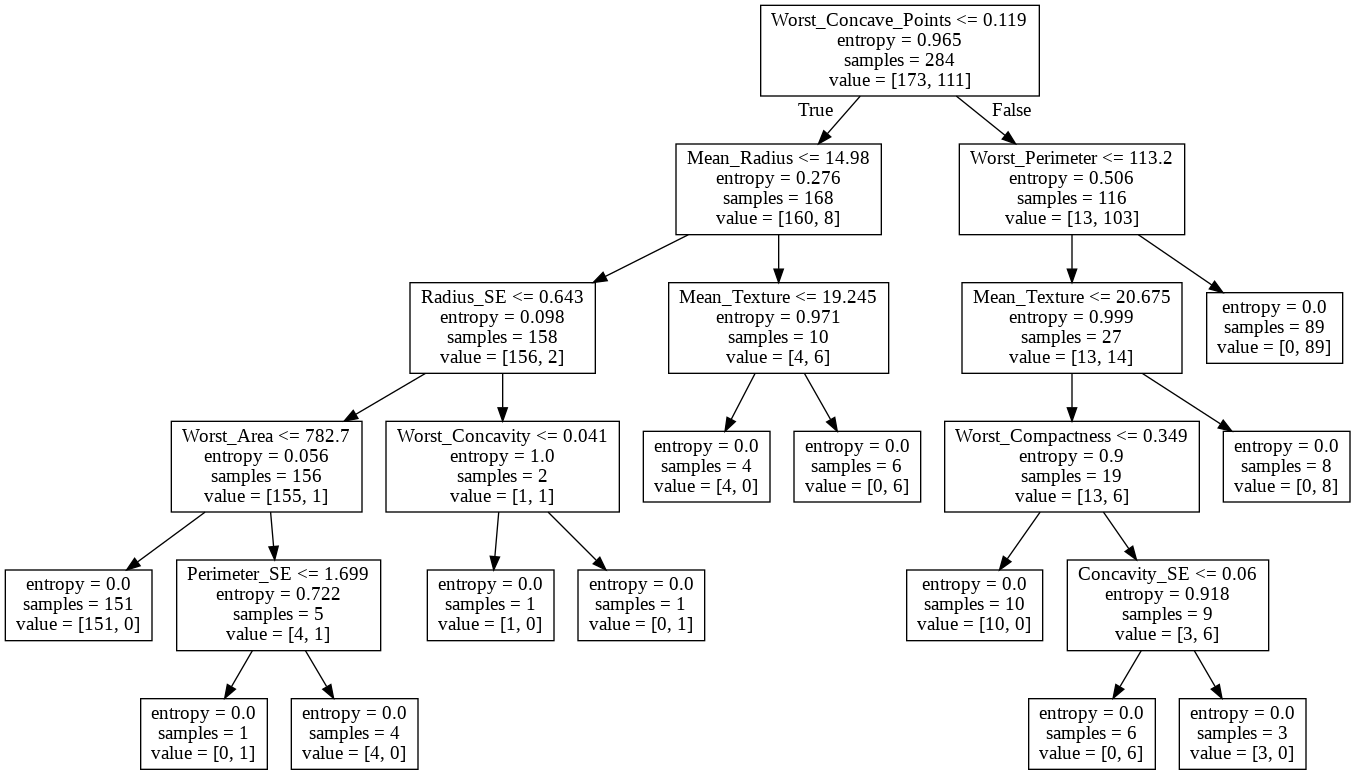

In [1983]:
from IPython.display import Image
from six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(entclf, out_file=dot_data, feature_names=features)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

entropy tree results

In [1984]:

#Predict the response for test dataset
y_pred = entclf.predict(X_test)
print(y_pred)
# Test decision tree accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0
 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0]
Accuracy: 0.9122807017543859


Random Entropy forrest

In [1985]:

rfentclf = RandomForestClassifier(criterion="entropy",n_estimators=10)
rfentclf = rfentclf.fit(X_train,y_train)
#Predict result from the data given
y_pred=rfentclf.predict(X_test)
print(y_pred)

#Test Random forrrest accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0]
Accuracy: 0.9508771929824561


testing via crossvalidation



In [1986]:
from sklearn.model_selection import cross_val_score
np.random.seed(1)
scores = cross_val_score(clf, X, y)
print('gini tree accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
scores = cross_val_score(rfclf, X, y)
print('gini random forest accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
scores = cross_val_score(entclf, X, y)
print('entropy accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
scores = cross_val_score(rfentclf, X, y)
print('entropy random forest accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))


gini tree accuracy = 0.9121099208197485 +/- 0.011235106844788624
gini random forest accuracy = 0.9525694767893185 +/- 0.016223037334090338
entropy accuracy = 0.9331936034777207 +/- 0.01540870493426004
entropy random forest accuracy = 0.9525384257102936 +/- 0.018922161707975938


Creating the Model For DecisionTreeRegression() (Problematic due to M/B classification rather than a series of numeric variables, may not be a viable model for this data)